# Searching For Potential NBA Player
Salah satu masalah terbesar di suatu tim adalah bagaimana mereka bisa mengakomodasi satu sama lain untuk mencapai kejuaraan bersama. dari dataset ini, kita akan mencoba membahas beberapa pemain yang cocok untuk berada di tim

Dataset ini terdiri dari : 

49 Leagues,Seasons, 11K players details & stats per Season Player Details: Birth Date, Height, Weight, Nationality, High School Stats per Season: Score, 3PA, Rebounds, Blocks, Assists, dll.

- League = League Name
- Season = Season Year YYYY-YYYY
- Stage = International, NBA:Playoffs,Regular_Seasion
- Player = Player Full Name
- Team = Team Name
- GP = Games Played
- MIN = Minutes Played
- FGM = Field Goals Made
- FGA = Field Goals Attempts
- 3PM = Three Points Made
- 3PA = Three Points Attempts
- FTM = Free Throws Made
- FTA = Free Throws Attempts
- TOV = Turnovers
- PF = Personal Fouls
- ORB = Offensive Rebounds
- DRB = Defensive Rebounds
- REB = Rebounds
- AST = Assists
- STL = Steals
- BLK = Blocks
- PTS = Points
- birth_year = Birth Year
- birth_month = Birth Month
- birth_date = Birth Date
- height = Height (Feet)
- height_cm = Height (CM)
- weight = Weight (Pounds)
- weight_kg = Weight (KG)
- nationality = Nationality
- high_school = High School



### Di proyek ini, saya melakukan EDA untuk para tim NBA yang sedang mencari pemain yang bisa mengakomodasi di tim tersebut

English Version : https://jovian.ml/benayaadhii/basketball-players-stats

## Downloading the Dataset

Setelah kita mencari datasets NBA, kita bisa melakukan download secara manual maupun menggunakan library opendatasets

In [1]:
# disini saya menggunakan opendataset
dataset_url = 'https://www.kaggle.com/jacobbaruch/basketball-players-stats-per-season-49-leagues' 

In [3]:
pip install opendatasets --upgrade

  Created wheel for kaggle: filename=kaggle-1.5.8-py3-none-any.whl size=73279 sha256=5c05d60b1452d0c59670094ea069cbc0a73cd0086d291eb97273ffd9334b0847
  Stored in directory: c:\users\benay\appdata\local\pip\cache\wheels\f3\67\7b\a6d668747974998471d29b230e7221dd01330ac34faebe4af4
  Created wheel for python-slugify: filename=python_slugify-4.0.1-py2.py3-none-any.whl size=6774 sha256=490ff6b4a673c44926ea7cc615289404e5fb38345d2dbfb36778ab999cfdedf3
  Stored in directory: c:\users\benay\appdata\local\pip\cache\wheels\91\4d\4f\e740a68c215791688c46c4d6251770a570e8dfea91af1acb5c
  Created wheel for slugify: filename=slugify-0.0.1-py3-none-any.whl size=1914 sha256=715d7f116887345a2827d7283ce74e5c024915a0864a9b524a3b4f06a515f4fb
  Stored in directory: c:\users\benay\appdata\local\pip\cache\wheels\a2\49\ff\b5d3130b393f908f0faebf7b4069b259e97d23821826553a76
Successfully built kaggle python-slugify slugify
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.9
    Uninstalli

In [7]:
import opendatasets as od
od.download(dataset_url) #eror karna sudah pernah download. nanti akan diminta user dan key 

Kaggle dataset ID:  jacobbaruch/basketball-players-stats-per-season-49-leagues


IndexError: list index out of range

In [8]:

data_dir = './basketball-players-stats-per-season-49-leagues'

In [9]:
import os
os.listdir(data_dir)

['players_stats_by_season_full_details.csv']

## Data Preparation and Cleaning

Sebelum kita melakukan analisa, kita harus memastikan bahwa data itu berjalan dan kita harus mengecek apakah ada data yang perlu dicleaning.


Data Cleaning adalah proses membetulkan / menghapus data yg salah,korupt,duplikat,data yg kurang lengkap,dll yg ada di dataset


In [14]:
# Kita harus melakukan import beberapa library untuk membantu kita dalam melakukan data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('basketball-players-stats-per-season-49-leagues/players_stats_by_season_full_details.csv')

check dataframe

In [16]:
df.head(10)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School
5,NBA,2019 - 2020,Regular_Season,Luka Doncic,DAL,61,2047.3,581,1255,171,...,1759,1999.0,Feb,"Feb 28, 1999",06-Jul,201.0,218.0,99.0,Slovenia,NaN
6,NBA,2019 - 2020,Regular_Season,Bradley Beal,WAS,57,2053.2,593,1303,170,...,1742,1993.0,Jun,"Jun 28, 1993",06-Mar,191.0,207.0,94.0,United States,Chaminade College Preparatory School
7,NBA,2019 - 2020,Regular_Season,LeBron James,LAL,67,2316.3,643,1303,148,...,1698,1984.0,Dec,"Dec 30, 1984",06-Aug,203.0,250.0,113.0,United States,St. Vincent St. Mary High School
8,NBA,2019 - 2020,Regular_Season,Donovan Mitchell,UTA,69,2364.0,602,1342,173,...,1655,1996.0,Sep,"Sep 7, 1996",06-Mar,191.0,215.0,98.0,United States,Brewster Academy
9,NBA,2019 - 2020,Regular_Season,Anthony Davis,LAL,62,2131.4,551,1096,72,...,1618,1993.0,Mar,"Mar 11, 1993",06-Oct,208.0,253.0,115.0,United States,Perspectives Charter Academy


check column 

In [17]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height', 'height_cm', 'weight', 'weight_kg', 'nationality',
       'high_school'],
      dtype='object')

# Describe Data

In [18]:
data_describe =[]

for i in df.columns: 
    data_describe.append([ #add i, type data, how many NaN, percentage , how many unique, unique value 
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum())/(len(df)))*100),2),
        df[i].nunique(),
        df[i].unique() 
    ])

In [19]:
DESC = pd.DataFrame(data_describe, columns=['column','type','nan','nan%','nunique','unique'])

In [20]:
DESC

,column,type,nan,nan%,nunique,unique
0,League,object,0,0.00,50,"[NBA, Euroleague, Israeli-BSL, Argentinian-Lig..."
1,Season,object,0,0.00,21,"[2019 - 2020, 2018 - 2019, 2017 - 2018, 2016 -..."
2,Stage,object,0,0.00,3,"[Regular_Season, International, Playoffs]"
3,Player,object,0,0.00,14574,"[James Harden, Damian Lillard, Devin Booker, G..."
4,Team,object,11,0.02,793,"[HOU, POR, PHX, MIL, ATL, DAL, WAS, LAL, UTA, ..."
5,GP,int64,0,0.00,85,"[68, 66, 70, 63, 60, 61, 57, 67, 69, 62, 73, 7..."
6,MIN,float64,0,0.00,16032,"[2482.6, 2473.7, 2511.8, 1916.9, 2120.1, 2047...."
7,FGM,int64,0,0.00,755,"[672, 624, 627, 685, 546, 581, 593, 643, 602, ..."
8,FGA,int64,0,0.00,1445,"[1514, 1349, 1283, 1238, 1249, 1255, 1303, 134..."
9,3PM,int64,0,0.00,257,"[299, 270, 141, 89, 205, 171, 170, 148, 173, 7..."


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,53798.0,30.365850,17.840423,1.0,17.0,29.0,37.0,85.0
MIN,53798.0,753.694277,534.242031,0.0,382.5,664.3,955.0,3485.0
FGM,53798.0,113.379438,100.207990,0.0,48.0,89.0,145.0,978.0
FGA,53798.0,245.480613,212.244452,0.0,109.0,196.0,310.0,2173.0
3PM,53798.0,28.503086,30.692830,0.0,6.0,20.0,41.0,402.0
3PA,53798.0,80.840626,80.720022,0.0,20.0,61.0,117.0,1028.0
FTM,53798.0,56.387356,59.273994,0.0,20.0,41.0,73.0,756.0
FTA,53798.0,76.140061,76.211933,0.0,28.0,56.0,99.0,972.0
TOV,53798.0,47.343674,37.402795,0.0,21.0,39.0,63.0,464.0
PF,53798.0,70.220213,45.617964,0.0,37.0,64.0,91.0,371.0


# Cleaning Data
Dalam cleaning data, saya menggunakan heatmap karna akan mudah untuk dilihat. column mana yg NULL , kolom mana yg ada isinya.

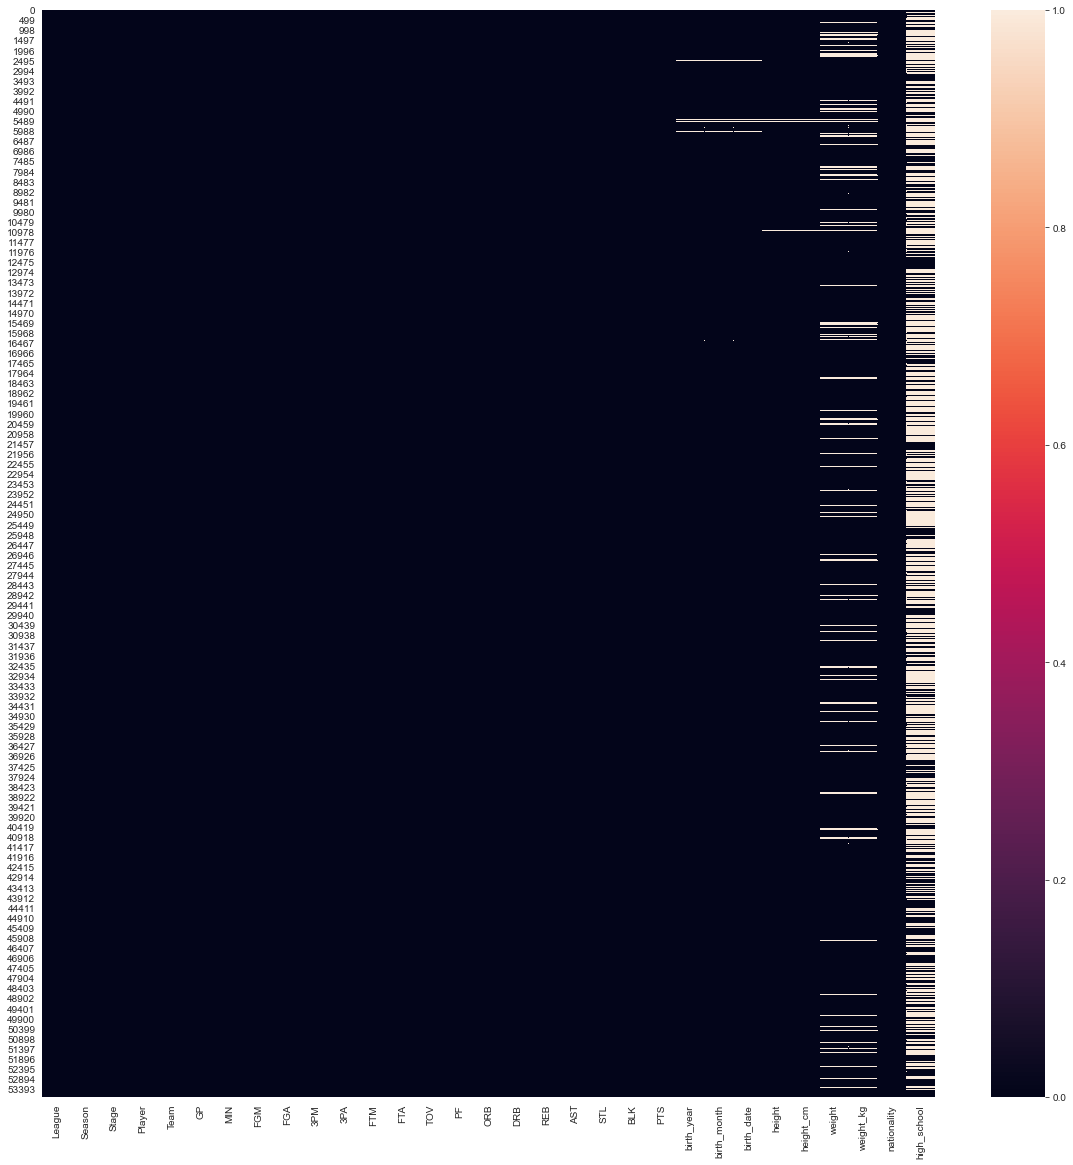

In [22]:
plt.figure(figsize=(20,20))#size
sns.heatmap(df.isna()) # for plotting using heatmap.
plt.show()

Dari data diatas, kita bisa melihat bahwa kolom high school banyak missing value data. tapi dikarenakan kita memfokuskan kepada mencari potensial player, kita tidak perlu drop / cleaning data high school.


## Exploratory Analysis and Visualization

Di sini saya melakukan beberapa analisis kepada data NBA

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline



Karena kita hanya fokus ke NBA, Maka kita harus define kolom NBA saja yg akan dipanggil

In [24]:
NBA = df[df['League']=='NBA'] #Create new variable called NBA. inside NBA variable we input only NBA League, not others like FIBA,EUROPE,else

Setelah kita fokus ke NBA, kita akan fokus lagi ke season 2019-2020 (tahun ini) disini kita juga bisa menggunakan 5tahun lalu sampai tahun ini. tetapi untuk skrg saya gunakan 2019-2020 karna pemain bisa ada yang pensiun. jadi kita fokus ke tahun ini untuk mencari yg paling menonjol

In [25]:
#Regular Season Of the NBA 2019-2020
Regular_Season = NBA[(NBA['Stage']=='Regular_Season')& (NBA['Season']=='2019 - 2020')]
Regular_Season

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,PTS,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,2335,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1978,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1863,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1857,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1778,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,NBA,2019 - 2020,Regular_Season,Matt Dellavedova,CLE,57,820.7,62,175,21,...,177,1990.0,Sep,"Sep 8, 1990",06-Apr,193.0,200.0,91.0,Australia,Australian Institute of Sport
274,NBA,2019 - 2020,Regular_Season,Goga Bitadze,IND,54,471.3,70,150,8,...,172,1999.0,Jul,"Jul 20, 1999",06-Nov,211.0,245.0,111.0,Georgia,NaN
275,NBA,2019 - 2020,Regular_Season,Nassir Little,POR,48,572.5,65,151,14,...,172,2000.0,Feb,"Feb 11, 2000",06-Jun,198.0,220.0,100.0,United States,Orlando Christian Prep High School
276,NBA,2019 - 2020,Regular_Season,David Nwaba,BRK,20,268.5,37,71,12,...,104,1993.0,Jan,"Jan 14, 1993",06-Apr,193.0,219.0,99.0,United States,University City High School


#### kemudian kita akan membuat kolom baru yang berisi Turnover percentage, assist per game,point per game dan rebound per game

In [26]:
Regular_Season['TOV_percentage'] = (100*Regular_Season['TOV']/(Regular_Season['FGA']+ 0.44 * Regular_Season['FTA'] + Regular_Season['TOV']))
Regular_Season['AstPerGame']= Regular_Season['AST']/Regular_Season['GP']
Regular_Season['PointPerGame']=Regular_Season['PTS']/Regular_Season['GP']
Regular_Season['ReboundPerGame']=Regular_Season['REB']/Regular_Season['GP']

<ipython-input-26-a7b9e592f0da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regular_Season['TOV_percentage'] = (100*Regular_Season['TOV']/(Regular_Season['FGA']+ 0.44 * Regular_Season['FTA'] + Regular_Season['TOV']))
<ipython-input-26-a7b9e592f0da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Regular_Season['AstPerGame']= Regular_Season['AST']/Regular_Season['GP']
<ipython-input-26-a7b9e592f0da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

### dari warning diatas, dikarenakan data kita sintetik maka akan ada warning. tetapi data tetap bisa dilihat maupun dijalankan

Salah satu kenapa saya memilih NBA untuk dilakukan analisis adalah sebagai berikut. saya melakukan perbandingan antar liga di bagian 3PM (dikarenakan dijaman sekarang 3point adalah hal yang sangat penting) maka dari itu saya melakukan groupby dan mengurutkan siapa yg mendominasi 3Point Made. Hasilnya adalah NBA

In [27]:
df.groupby('League')['3PM'].sum().sort_values(ascending=False)

League
NBA                                   304270
Spanish-ACB                            70479
German-BBL                             63133
Australian-NBL                         63133
Italian-Lega-Basket-Serie-A            59862
Chinese-CBA                            56676
Euroleague                             54971
French-Jeep-Elite                      54458
Argentinian-Liga-A                     50843
Eurocup                                44898
Brazilian-NBB                          33265
Polish-TBL                             29102
Finnish-Korisliiga                     28999
Mexican-LNBP                           28359
Turkish-BSL                            27026
Czech-NBL                              25608
Hungarian-NBIA                         24855
South-Korean-KBL                       24198
Japanese-BLeague                       23759
Serbian-KLS                            22642
Swedish-Basketligan                    22456
Canadian-NBL                           21753
Isr

Selanjutnya saya ingin mencoba mencari, apakah pemain NBA itu hanya untuk orang amerika saja? dan menemukan hasil ternyata tidak. saya bisa menyimpulkan tidak karena saya melakukan analisa dibawah, dimana setiap tim di NBA di group. dan kita lihat apakah ada yg berbeda kewarganegaraannya. dan ternyata bisa dilihat bahwa ada berbagai jenis kewarganegaraan. (saya bisa mempunyai pemikiran amerika saja karna bisa dilihat di wikipedia bahwa NBA adalah American men's professional basketball league.)

In [28]:
Regular_Season.groupby('Team')['nationality'].nunique().sort_values(ascending=False)

Team
PHI    6
OKC    6
TOR    5
SAS    5
SAC    5
DAL    5
UTA    5
WAS    4
MIN    4
CLE    4
MEM    4
ORL    4
NYK    4
PHX    4
POR    3
MIL    3
MIA    3
BOS    3
IND    3
CHI    3
DET    3
DEN    3
NOP    2
CHA    2
GSW    2
HOU    2
LAC    2
ATL    2
BRK    1
LAL    1
Name: nationality, dtype: int64

#### PHI and OKC has the most diverse nationality. 

# Asking and Answering Questions

Di sini saya mencoba mencari insight untuk membantu menyelesaikan masalah dan mencapai goals. yaitu mencari pemain yg potensial

# Q1 : What is the average Age of NBA Player?

dari pertanyaan diatas, kita harus mencari rata2 dari player dengan cara , kita mengecek birth year kemudian mengurangkan dg Season skrg (yaitu 2020)

In [29]:
NBA['Age'] = NBA['Season'].str.split('-').str[1].astype(float) - NBA['birth_year']

<ipython-input-29-44c8d89e269f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NBA['Age'] = NBA['Season'].str.split('-').str[1].astype(float) - NBA['birth_year']


Diatas, saya membuat kolom usia dengan menggunakan split dan mencari index 1 (yg blkg) karna kita tau 2019-2020 di split menjadi [2019],[2020] .

In [30]:
NBA 

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,Age
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,1989.0,Aug,"Aug 26, 1989",06-May,196.0,220.0,100.0,United States,Artesia High School,31.0
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,1990.0,Jul,"Jul 15, 1990",06-Mar,191.0,195.0,88.0,United States,Oakland High School,30.0
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,1996.0,Oct,"Oct 30, 1996",06-Jun,198.0,206.0,93.0,United States,Moss Point High School,24.0
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,1994.0,Dec,"Dec 6, 1994",06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN,26.0
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,1998.0,Sep,"Sep 19, 1998",06-Feb,188.0,180.0,82.0,United States,Norman High School,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53793,NBA,1999 - 2000,Playoffs,John Salley,LAL,18,78.0,5,13,0,...,1964.0,May,"May 16, 1964",06-Nov,211.0,230.0,104.0,United States,Canarsie High School,36.0
53794,NBA,1999 - 2000,Playoffs,Muggsy Bogues,TOR,3,87.0,6,21,3,...,1965.0,Jan,"Jan 9, 1965",05-Mar,160.0,136.0,62.0,United States,Dunbar High School,35.0
53795,NBA,1999 - 2000,Playoffs,Jerome Williams,DET,3,73.0,7,14,0,...,1973.0,May,"May 10, 1973",06-Sep,206.0,206.0,93.0,United States,Magruder High School,27.0
53796,NBA,1999 - 2000,Playoffs,Randy Livingston,PHX,7,63.0,6,27,2,...,1975.0,Apr,"Apr 2, 1975",06-Apr,193.0,209.0,95.0,United States,Isidore Newman School,25.0



Setelah kita membuat dan menemukan kolom umur , kita group berdasarkan season dan mencari rata2 umur mereka. 

In [31]:
NBA.groupby('Season')['Age'].mean() 

Season
1999 - 2000    29.304094
2000 - 2001    28.847619
2001 - 2002    28.507837
2002 - 2003    28.818681
2003 - 2004    28.185075
2004 - 2005    28.091160
2005 - 2006    27.988095
2006 - 2007    27.855856
2007 - 2008    27.939227
2008 - 2009    27.599432
2009 - 2010    27.827586
2010 - 2011    27.758112
2011 - 2012    27.925532
2012 - 2013    28.068120
2013 - 2014    28.132964
2014 - 2015    28.329480
2015 - 2016    28.011429
2016 - 2017    27.934091
2017 - 2018    27.825581
2018 - 2019    27.537931
2019 - 2020    27.043165
Name: Age, dtype: float64

In [32]:
# Jika kita ingin melihat average pemain NBA tanpa digroup per season : 
print('Average Of NBA Player : ',NBA['Age'].mean())


Average Of NBA Player :  28.067156208277705


# Q2 : Who is the TOP NBA Players who hits 3 pts in this season?

Dari pertanyaan diatas, kita akan mencari top 10 player berdasarkan 3pts made

0         James Harden
19         Buddy Hield
67     Duncan Robinson
1       Damian Lillard
45     Devonte' Graham
4           Trae Young
49    Tim Hardaway Jr.
89       Davis Bertans
10       C.J. McCollum
12        Jayson Tatum
Name: Player, dtype: object


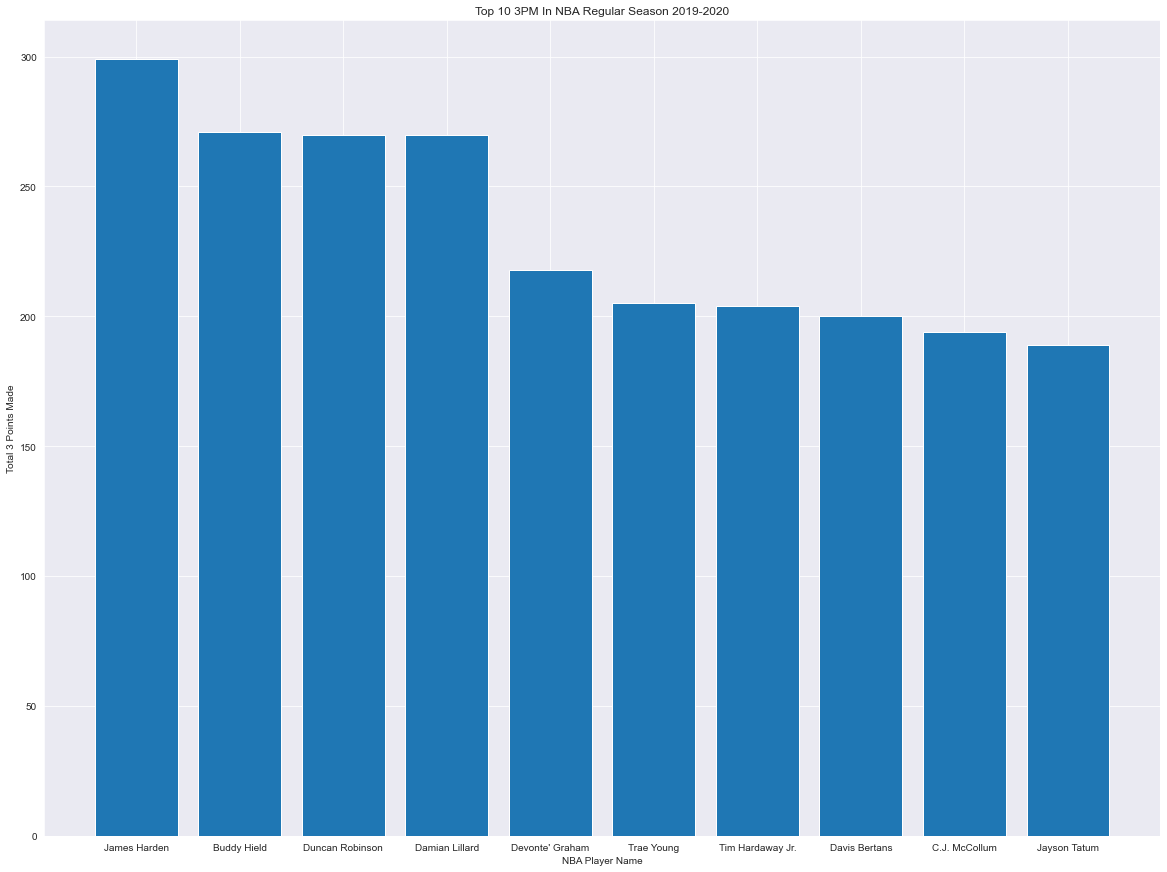

In [38]:
#TOP 10 NBA Player who hit 3 point
three_pts = Regular_Season.sort_values(by=['3PM'],ascending=False)#sort how many 3pts made in a season from high to lowest 
print(three_pts['Player'].head(10))
print('='*100)
plt.figure(figsize=(20,15)) #size of the chart
plt.bar(three_pts['Player'].head(10),three_pts['3PM'].head(10)) #top 10 only player name in x. and y is how many pts they achieved
plt.xlabel('NBA Player Name') 
plt.ylabel('Total 3 Points Made')
plt.title('Top 10 3PM In NBA Regular Season 2019-2020') 
plt.show() 

#### Dari Visualisasi diatas, kita bisa lihat bahwa James Harden adalah pemain yg berhasil mencetak 3Points terbanyak

# Q3 : Who shoots efficiently from the data above?

#### Dari data diatas, kita bisa lihat bahwa James Harden pemain yg mencetak 3pts terbanyak. mari kita lihat apakah James harden Efisien dalam mencetak 3point dengan cara kita bagi 3pts made dengan 3points attempt

In [39]:
efficienct = (three_pts['3PM']/three_pts['3PA'])
ef = efficienct.head(10) #from this top 10 we found the percentage 
print(ef)
print('='*100)
s=ef.sort_values(ascending=False)
print(ef.sort_values(ascending=False)) #we sort top 10 players from highest to lowest 


0     0.354686
19    0.393895
67    0.445545
1     0.400593
45    0.372650
4     0.360915
49    0.397661
89    0.423729
10    0.378906
12    0.402985
dtype: float64
67    0.445545
89    0.423729
12    0.402985
1     0.400593
49    0.397661
19    0.393895
10    0.378906
45    0.372650
4     0.360915
0     0.354686
dtype: float64


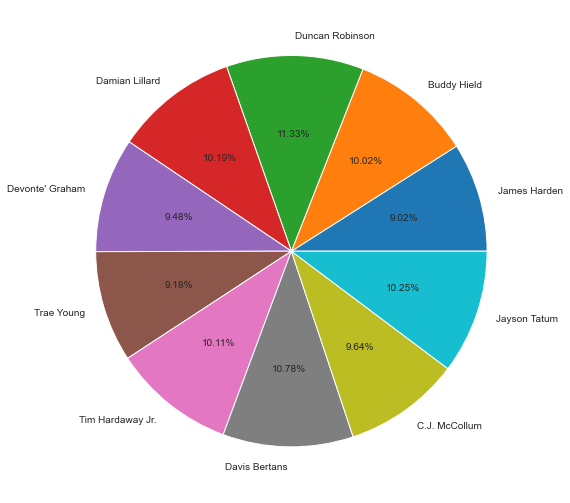

In [40]:
figgg = plt.subplots(figsize=(12,9))
plt.pie(ef.head(10),labels=three_pts['Player'].head(10), #pie chart
        startangle=0,autopct='%1.2f%%' #angle 0 and we display the percentage.
        )
plt.show()


#### Dari pie chart diatas, pemain yg paling effisien mencetak 3pts di season ini / 2019-2020 adalah Duncan Robinson

#### Kita tau Duncan Robinson effisien. tapi apakah dia konsisten dalam year to year?

In [41]:
NBA[NBA['Player']=='Duncan Robinson'] 

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,birth_year,birth_month,birth_date,height,height_cm,weight,weight_kg,nationality,high_school,Age
67,NBA,2019 - 2020,Regular_Season,Duncan Robinson,MIA,73,2165.6,323,687,270,...,1994.0,Apr,"Apr 22, 1994",06-Aug,203.0,210.0,95.0,United States,Phillips Exeter Academy,26.0


#### Dari sini kita belum bisa menyimpulkan dia konsisten shooter / tidak karna ini tahun pertama di NBA. TAPI dia mempimpin dalam 3pts Percentage yg menandakan pertanda bagus. Dan berikut adalah data pendukung yang bisa membuat dia akan menjadi pemain yg konsisten 
1. https://www.youtube.com/watch?v=lmlP6ASpKXM
2. https://www.wsj.com/articles/duncan-robinson-heat-nba-williams-michigan-11576095466
3. Duncan Robinson berada di Miami Heat Team. dan Miami Heat memenangkan Eastern Conference Finals dan menuju Final NBA Champion ! (https://www.nba.com/longest-gap-between-finals-appearances setelah 6 tahun tidak pernah masuk Final)

# Q4 : Let say we already got Duncan Robinson for our shooting guard. How we find the best playmaker in 2019 - 2020 Season to acomodate Duncan Robinson?

dari pertanyaan diatas, kita memerlukan pemain yg mempunyai tingkat presentase Turnover terendah dan rata2 assist lebih dr 7. Kenapa ? karna turnover rendah sangat diperlukan untuk playmaker, dia akan selalu membawa bola dan tingkat turnover harus rendah. assist 7 keatas dikarenakan playmaker harus bisa memberikan permainan yg baik untuk team nya dan membuahkan hasil. dan rata2 pemain di NBA yg dibilang playmaker bagus adalah mempunyai rata2 assists 5 keatas

In [42]:
Regular_Season.head(2)

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,height,height_cm,weight,weight_kg,nationality,high_school,TOV_percentage,AstPerGame,PointPerGame,ReboundPerGame
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,06-May,196.0,220.0,100.0,United States,Artesia High School,14.167433,7.529412,34.338235,6.558824
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,06-Mar,191.0,195.0,88.0,United States,Oakland High School,10.954758,8.030303,29.969697,4.303030


kita menentukan TOV percentage harus dibawah 20% , asist per game diatas 7 dan tinggi < 195cm. kenapa harus dibawah 195cm, karna tinggi akan menentukan kecepatan pemain tersebut, kemudian rata2 tinggi playmaker juga sekitar 180-195cm (https://en.wikipedia.org/wiki/Point_guard) 

In [43]:
PlayMaker = Regular_Season[(Regular_Season['TOV_percentage']<20)& (Regular_Season['AstPerGame']>7)&(Regular_Season['height_cm']<195)]

In [44]:
PlayMaker.sort_values(by=['TOV_percentage'])

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,height,height_cm,weight,weight_kg,nationality,high_school,TOV_percentage,AstPerGame,PointPerGame,ReboundPerGame
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,06-Mar,191.0,195.0,88.0,United States,Oakland High School,10.954758,8.030303,29.969697,4.303030
45,NBA,2019 - 2020,Regular_Season,Devonte' Graham,CHA,63,2211.3,368,963,218,...,06-Feb,188.0,185.0,84.0,United States,Broughton High School,14.520425,7.476190,18.174603,3.365079
11,NBA,2019 - 2020,Regular_Season,Russell Westbrook,HOU,57,2049.2,604,1281,55,...,06-Mar,191.0,200.0,91.0,United States,Leuzinger High School,14.971818,7.035088,27.245614,7.912281
48,NBA,2019 - 2020,Regular_Season,Kyle Lowry,TOR,58,2098.3,334,803,164,...,06-Jan,185.0,196.0,89.0,United States,Cardinal Dougherty High School,15.725493,7.465517,19.413793,5.034483
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,06-Feb,188.0,180.0,82.0,United States,Norman High School,16.199915,9.333333,29.633333,4.250000
32,NBA,2019 - 2020,Regular_Season,Ja Morant,MEM,67,2074.2,447,937,60,...,06-Mar,191.0,175.0,79.0,United States,Crestwood High School,17.021013,7.283582,17.805970,3.850746
85,NBA,2019 - 2020,Regular_Season,Ricky Rubio,PHX,65,2016.4,287,692,78,...,06-Apr,193.0,190.0,86.0,Spain,NaN,17.937871,8.769231,13.030769,4.676923


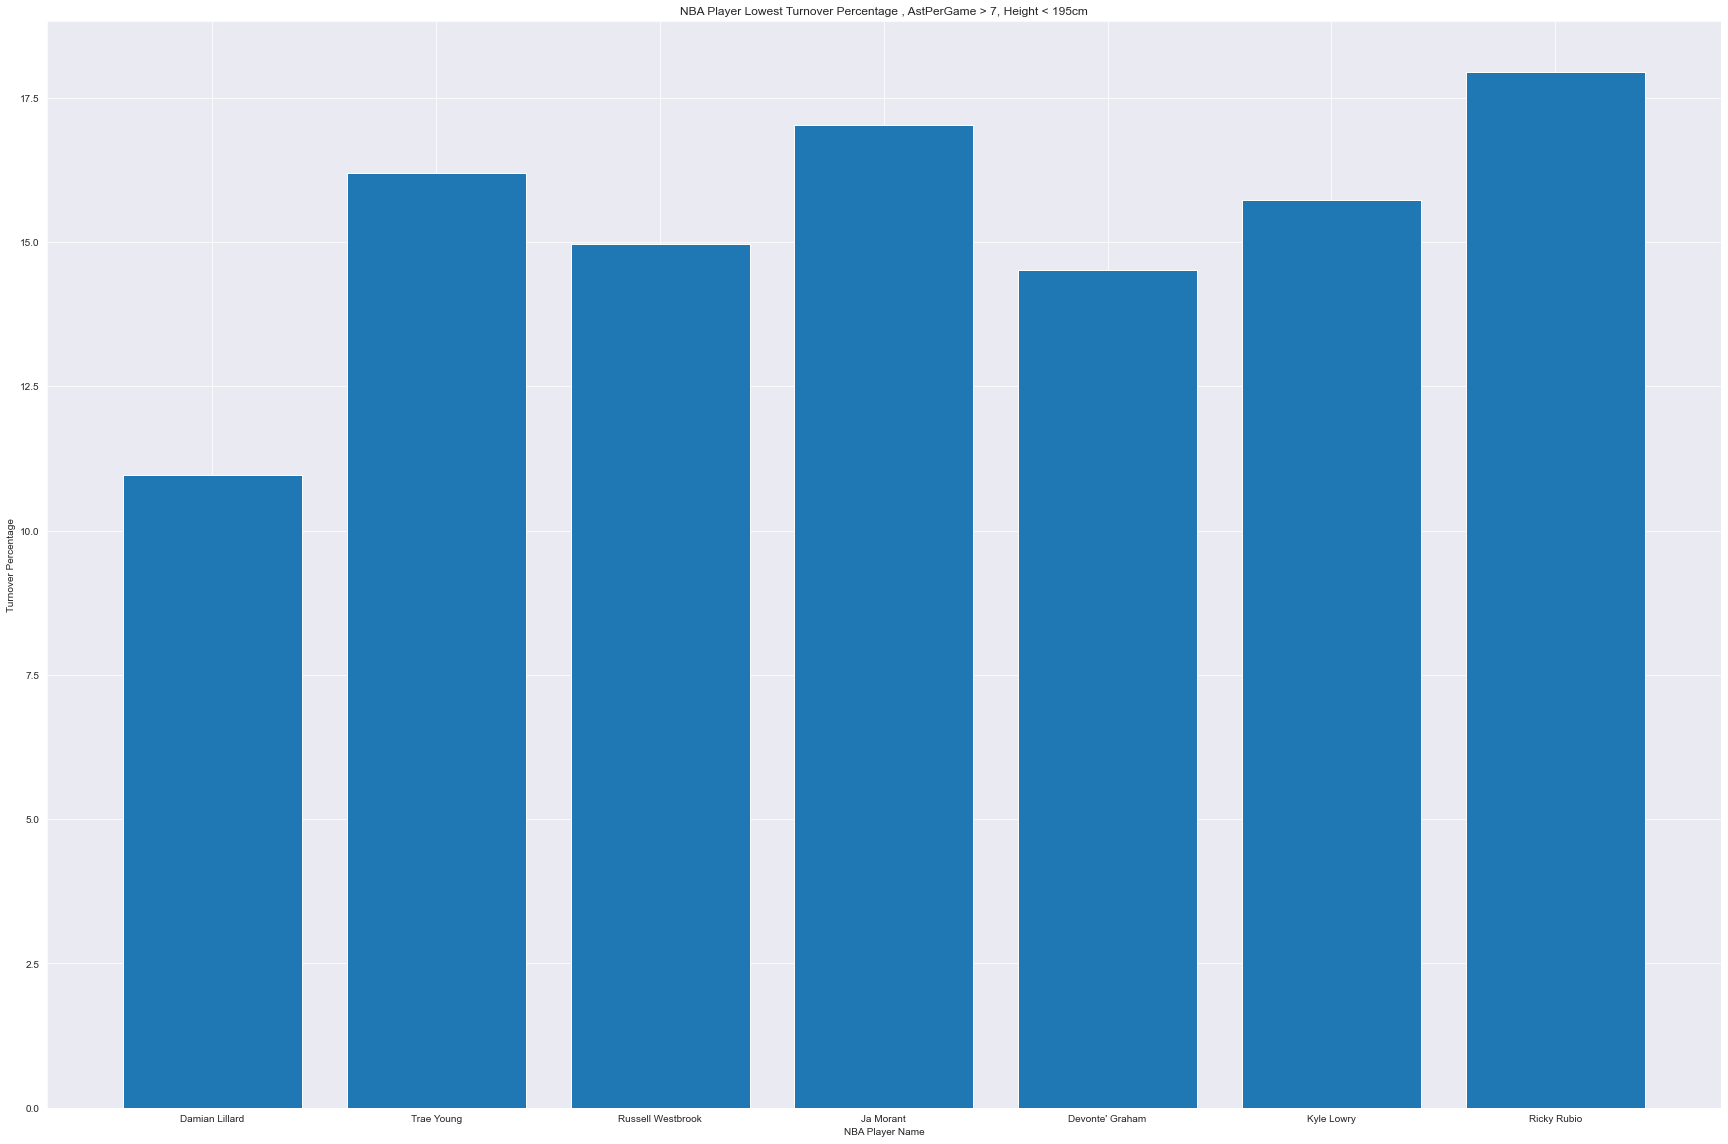

In [45]:
plt.figure(figsize=(30,20)) #size of the chart
plt.bar(PlayMaker['Player'],PlayMaker['TOV_percentage']) 
plt.xlabel('NBA Player Name') #x label
plt.ylabel('Turnover Percentage') #y label
plt.title('NBA Player Lowest Turnover Percentage , AstPerGame > 7, Height < 195cm') #title
plt.show()


#### Dari grafik diatas, kita bisa menyimpulkan bahwa opsi terbaik adalah Damian Lillard, karena dia mempunyai tingkat TOV terendah, rata2 assist lebih dr 7 per game dan kita bisa lihat bahwa dia masuk dalam top 10 Shooter ! 

# Q5 : Now after we have playmaker and shooting guard, we need Small Forward who can score well, and rebound well

kenapa harus diatas 20 dan rebound 8? Karena Small forward adalah pemain yang harus bisa melakukan offense maupun defense yg baik. Small Forward adalah salah satu kunci tim bisa memimpin jauh dibanding tim lainnya.

In [46]:
Small_Forward=Regular_Season[(Regular_Season['PointPerGame']>20)&(Regular_Season['ReboundPerGame']>8)& (Regular_Season['height_cm']<205)]

In [47]:
Small_Forward

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,height,height_cm,weight,weight_kg,nationality,high_school,TOV_percentage,AstPerGame,PointPerGame,ReboundPerGame
5,NBA,2019 - 2020,Regular_Season,Luka Doncic,DAL,61,2047.3,581,1255,171,...,06-Jul,201.0,218.0,99.0,Slovenia,NaN,14.753615,8.819672,28.836066,9.393443


Dari data diatas, hanya Luka doncic yg memenuhi standar diatas. dan jika kita lihat umur nya, dia merupakan pemain yg muda (potensi bagus untuk suatu franchise tim. karena chance dia berkembang akan semakin tinggi)
data pembantu : https://www.youtube.com/watch?v=YnPoW-IttS0

# Q6 : Is there any Outliers in PTS NBA Player 2019-2020 Season?


dari outlier data (jika ada) ,kita bisa melihat siapa pemain yg paling menonjol dalam point maupun paling kurang dalam points

In [48]:
Regular_Season.describe()['PTS'].T #we need to describe PTS so we can know the 25%,median,75%

count     278.000000
mean      724.089928
std       396.580923
min        78.000000
25%       420.000000
50%       644.500000
75%       948.250000
max      2335.000000
Name: PTS, dtype: float64

In [49]:
Q3 = Regular_Season.describe()['PTS']['75%']
Q1 = Regular_Season.describe()['PTS']['25%']

IQR (interquartile range) = Q3-Q1

In [50]:
IQR = Q3-Q1
IQR

528.25

In [51]:
UpperFence = Q3 + (1.5*IQR)

UpperFence

1740.625

In [52]:
LowerFence = Q1 - (1.5*IQR)

LowerFence

-372.375

In [53]:
outliers = Regular_Season[(Regular_Season['PTS'] < LowerFence) | (Regular_Season['PTS'] > UpperFence)]

outliers.sort_values(by= 'PTS', ascending=False).head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,height,height_cm,weight,weight_kg,nationality,high_school,TOV_percentage,AstPerGame,PointPerGame,ReboundPerGame
0,NBA,2019 - 2020,Regular_Season,James Harden,HOU,68,2482.6,672,1514,299,...,06-May,196.0,220.0,100.0,United States,Artesia High School,14.167433,7.529412,34.338235,6.558824
1,NBA,2019 - 2020,Regular_Season,Damian Lillard,POR,66,2473.7,624,1349,270,...,06-Mar,191.0,195.0,88.0,United States,Oakland High School,10.954758,8.030303,29.969697,4.303030
2,NBA,2019 - 2020,Regular_Season,Devin Booker,PHX,70,2511.8,627,1283,141,...,06-Jun,198.0,206.0,93.0,United States,Moss Point High School,14.907169,6.514286,26.614286,4.242857
3,NBA,2019 - 2020,Regular_Season,Giannis Antetokounmpo,MIL,63,1916.9,685,1238,89,...,06-Nov,211.0,242.0,110.0,Greece / Nigeria,NaN,13.182329,5.619048,29.476190,13.587302
4,NBA,2019 - 2020,Regular_Season,Trae Young,ATL,60,2120.1,546,1249,205,...,06-Feb,188.0,180.0,82.0,United States,Norman High School,16.199915,9.333333,29.633333,4.250000


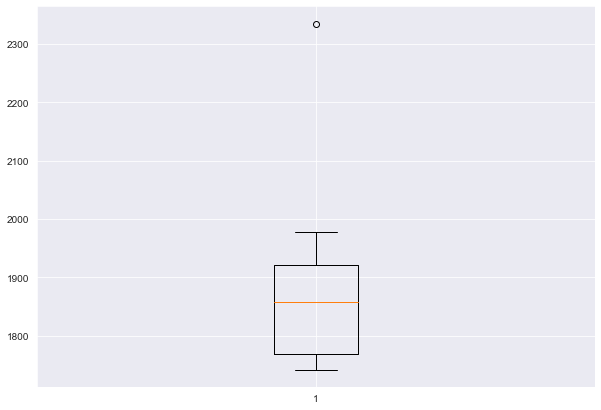

In [54]:
plt.figure(figsize=(10,7))
plt.boxplot(outliers['PTS'])
plt.show()

Dari Boxplot diatas, kita bisa lihat bahwa hanya 1 pemain yg mempunyai record luar biasa di points dalam season 2019-2020. Yaitu James Harden. dari sini kita bisa simpulkan bahwa dia memimpin dalam PTS dan melampaui normal PTS.

## Inferences and Conclusion

Dari data diatas, kita bisa simpulkan beberapa aspek yg dapat membantu suatu team . yaitu :
- mencari pemain dari 3pts tertinggi (untuk membantu mencetak poin)
- Mencari pemain yang kira2 dibutuhkan di dalam team (apakah playmaker,smallforward,shooting guard,dll)


#### dari boxplot diatas, season ini(2019-2020) James Harden mempunyai skor yg fenomenal.
### Analisa ini bisa membantu untuk improve suatu team, mencari pemain yg kira2 bisa cocok untuk suatu team(segi skoring/akomodasi assists), Bahkan bisa juga untuk membuat team baru (franchise baru)

## References and Future Work


Refrences : 
- https://www.basketball-reference.com/
- https://www.kaggle.com/
- www.stackoverflow.com